<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>1. Diseño molecular con SMILES y RDKit</b> </font>
<a name="loading"></a>

<font size='4' style="color:#00A6D6">  <b>Jesus Alvarado-Huayhuaz

</b> </font>
<a name="loading"></a>

<br>
<br>
<br>
<br>
<br>
<font size='4' style="color:#00A6D6">  <b>1.1. Qué es RDkit?</b> </font>
<a name="loading"></a>

RDKit es una colección de programas de quimioinformática y aprendizaje automático escrito en C++ y Python, disponible en https://github.com/rdkit/rdkit

<br>

Iniciaremos instalándola desde miniconda, para luego importar funciones que nos permitan dibujar desde código SMILES hasta extraer descriptores fisicoquímicos.


Fue desarrollado y usado en descubrimiento racional de fármacos desde el año 2000 para construir modelos predictivos para ADME, Tox, actividad biológica, etc. En el 2006 se disponibilizo mediante código abierto y su desarrollo continúa con la contribución de Novartis.


La documentación se encuentra disponible en https://www.rdkit.org/docs/index.html


RDKit provee varias funciones para representar las moléculas en código SMILES

![imagen](https://i0.wp.com/chrisvoncsefalvay.com/wp-content/uploads/2019/08/1zqZayOPLIyGrpBSTEVmPdw.png?resize=1024%2C862&is-pending-load=1#038;ssl=1)

In [ ]:
#Instalación de miniconda y rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh 
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh 
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local 
! conda install -c rdkit rdkit -y 
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

Buscando algunas propiedades

In [ ]:
m = Chem.MolFromSmiles('CCCCC')
m.GetNumAtoms()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs

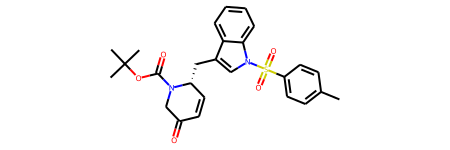

In [ ]:
#molécula random
molecula = Chem.MolFromSmiles('O=C1CN(C(OC(C)(C)C)=O)[C@](C=C1)([H])CC2=CN(S(=O)(C3=CC=C(C)C=C3)=O)C4=CC=CC=C42')
molecula

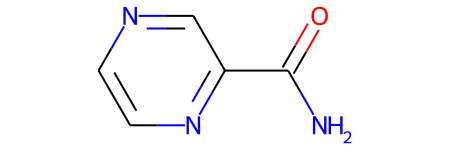

In [ ]:
pyrazinamide = Chem.MolFromSmiles("c1(C(=O)N)nccnc1")
pyrazinamide

In [ ]:
mw = Descriptors.MolWt(pyrazinamide)
mw

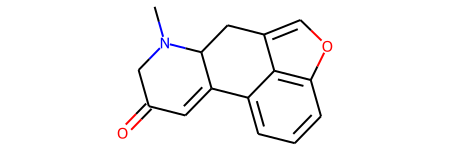

In [ ]:
isoniazid = Chem.MolFromSmiles('CN2CC(=O)C=C1c3cccc4Occ(CC12)c34')
isoniazid

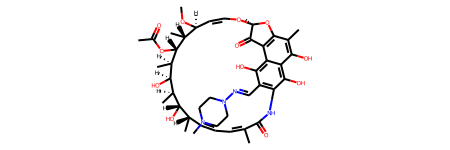

In [ ]:
rifampicin = Chem.MolFromSmiles('C[C@H]1/C=C/C=C(\C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=O)[C@](O4)(O/C=C/[C@@H]([C@H]([C@H]([C@@H]([C@@H]([C@@H]([C@H]1O)C)O)C)OC(=O)C)C)OC)C)C)O)O)/C=N/N5CCN(CC5)C)/C')
rifampicin

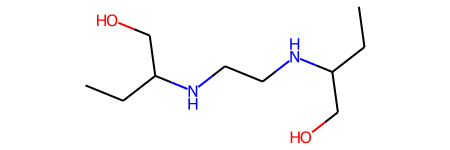

In [ ]:
ethambutol = Chem.MolFromSmiles('CCC(CO)NCCNC(CC)CO')
ethambutol

In [ ]:
#ejemplo de lista y for
jesus = ['maria',123,1.3,'1@']

for hola in jesus:
  print('chau')

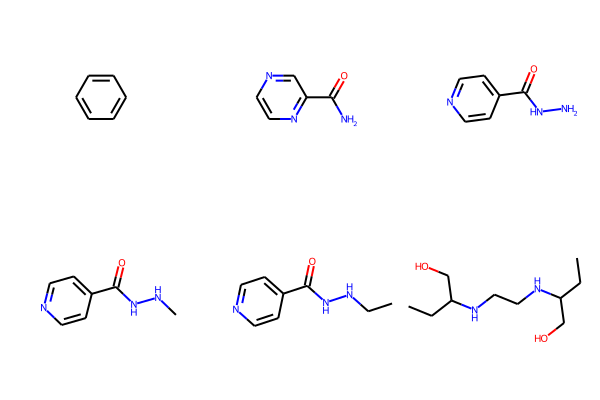

In [ ]:
# Construyendo una familia de moléculas
antiTBC = ['c1ccccc1','c1(C(=O)N)nccnc1','C1=CN=CC=C1C(=O)NN','C1=CN=CC=C1C(=O)NNC', 'C1=CN=CC=C1C(=O)NNCC','CCC(CO)NCCNC(CC)CO']

mol_lista = []

for i in antiTBC:
  mol = Chem.MolFromSmiles(i)
  #print(i)
  mol_lista.append(mol)

Draw.MolsToGridImage(mol_lista)
#img = Draw.MolsToGridImage(mol_lista)
#img

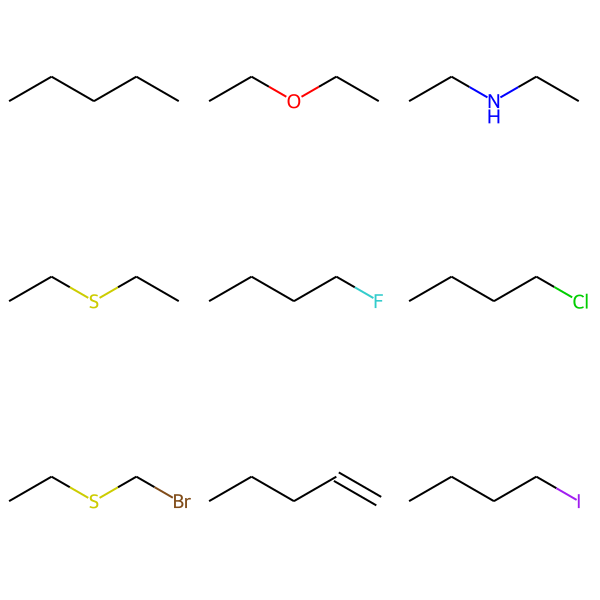

In [ ]:
smiles_list = ['CCCCC', 'CCOCC','CCNCC',
               'CCSCC','CCCCF','CCCCCl',
               'CCSCBr','CCCC(=C)','CCCCI']

#Ahora usando "list comprehension"
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

imagen = Draw.MolsToGridImage(mol_list)
imagen

In [ ]:
type(smiles_list)

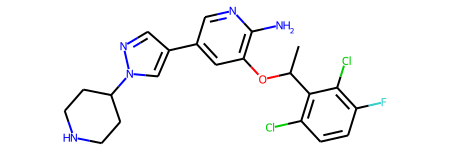

In [ ]:
#Creamos una semilla
testsmi = 'CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N=C3)C4CCNCC4)N'
mol1 = Chem.MolFromSmiles(testsmi)
mol1

In [ ]:
#Formaremos 50 moléculas usando la semilla e indicaremos el
# el número de átomos de todas estas moléculas
mols = []
parababel = []
for _ in range(50):
  smi = Chem.MolToSmiles(mol1, doRandom=True)
  #print(smi)
  #Creando una lista para usarla después en Obabel
  parababel.append(smi)
  m = Chem.MolFromSmiles(smi)
  print(smi, m.GetNumAtoms())
  mols.append(m)

In [ ]:
#Observando la lista
print(parababel)

In [ ]:
# Si sumamos el número de elementos de "mols" y "parababel"  
len(mols+parababel)

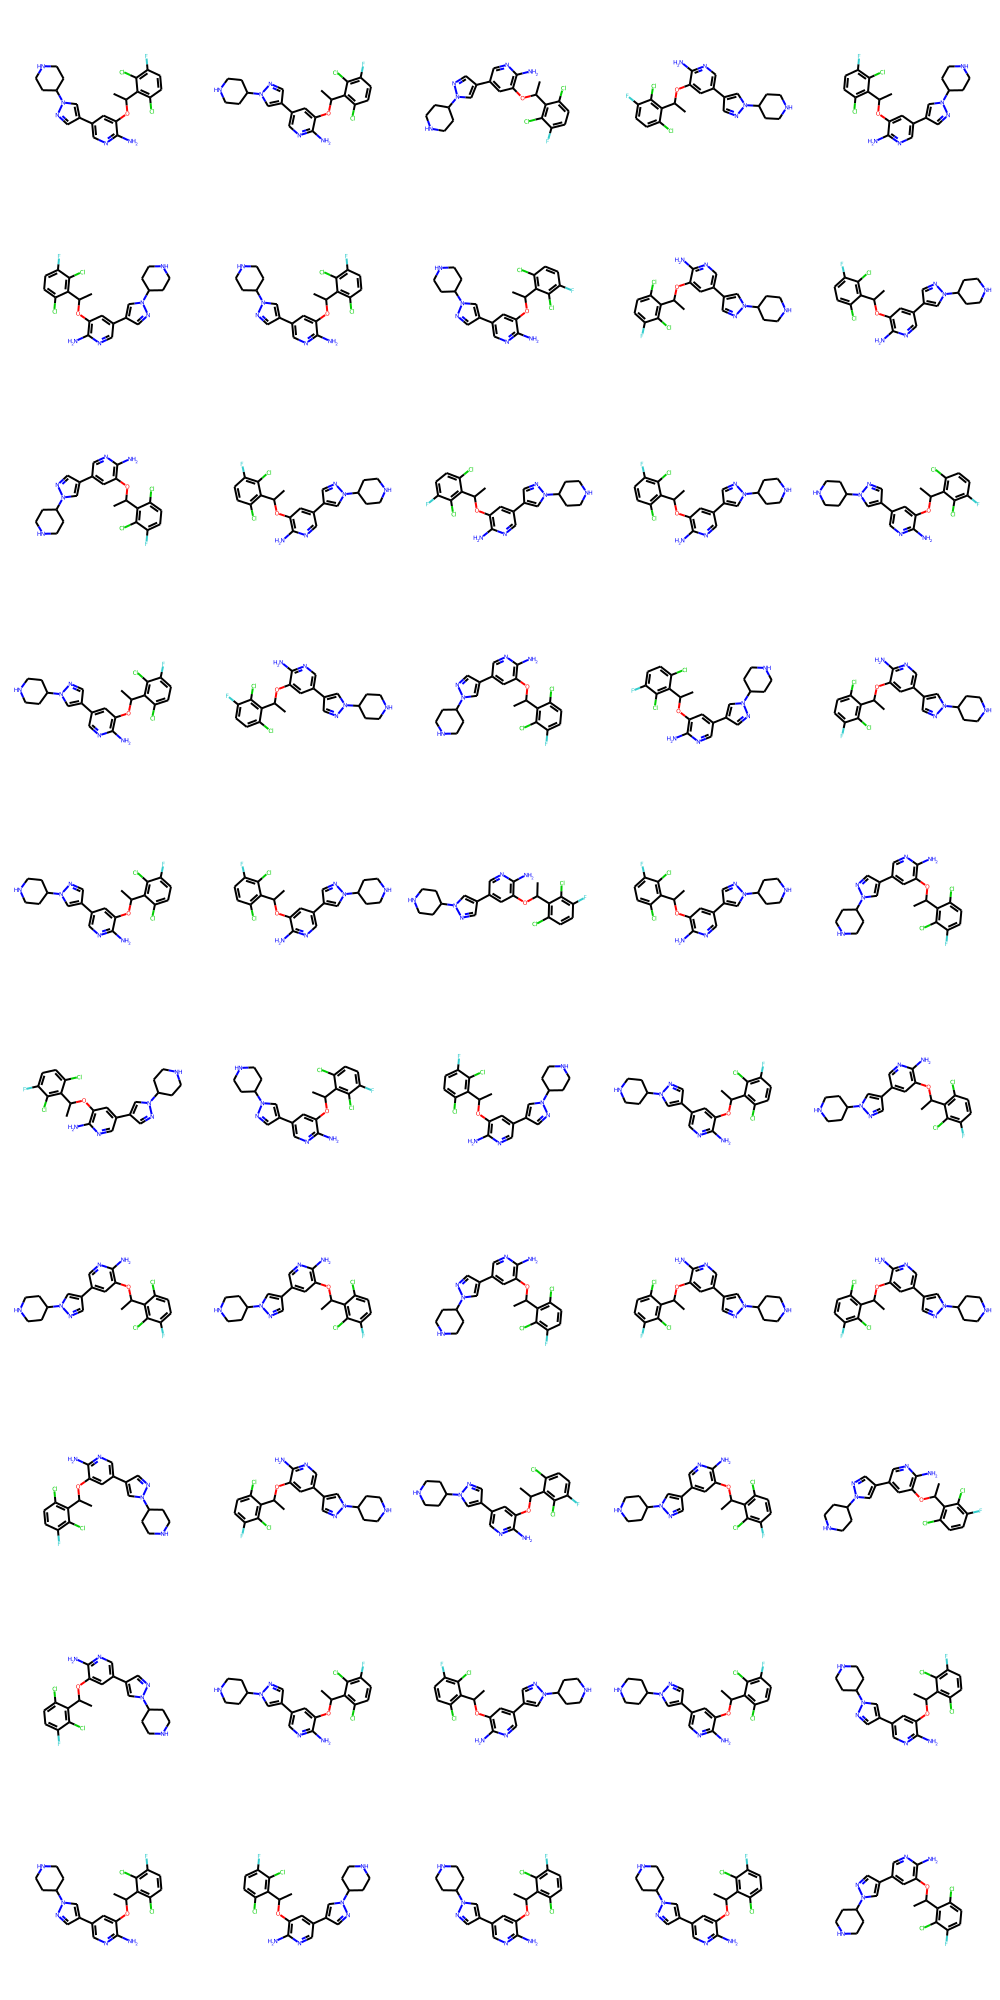

In [ ]:
#Observando las moléculas en mol, por fila de 5 archivos
Draw.MolsToGridImage(mols, molsPerRow = 5)

Guardar una lista como csv en python. Cambiar la extension a smi

In [ ]:
import pandas as pd

In [ ]:
moleculasRandom = pd.DataFrame(parababel)
moleculasRandom.to_csv('resultados_previos.smi',index=False)
moleculasRandom

In [ ]:
#Usando archivos en nuestro drive (retirar el numeral para ejecutar las líneas necesarias)
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Dirigiéndonos hacia el path requerido
#%cd /content/drive/MyDrive/path

# 2. Conversión de formato con Open Babel

In [ ]:
!apt-get -qq install -y openbabel

In [ ]:
!obabel --help

In [ ]:
#cargamos un archivo de prueba para optimizar
!ls

Empleamos Obabel para generar la estructura en 3D

In [ ]:
!obabel -i smi parababel.smi -o sdf --gen3D > output.sdf

In [ ]:
#Verificar si tenemos avisos de alerta o warnings
!grep WARNING output_teste.sdf

Si tenemos warnings ejecutamos las siguientes 3 celdas

In [ ]:
#!cp output.sdf output_edit.sdf

In [ ]:
#!grep -v WARNING output_edit > output.sdf

In [ ]:
#!grep WARNING output.sdf

Como todas las estructuras se encuentran en un mismo archivo, las vamos a separar y cambiar a formato mol2

In [ ]:
!obabel -i sdf output.sdf -o mol2 -O _.mol2 -h -m

# 3. Preoptimización con MMFF94

In [ ]:
!obabel *.mol2 -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m

In [ ]:
# Si requerimos convertirlas a pdbqt para ejecutarlas en Vina
#!obabel -i xyz *.xyz -o pdbqt -O lig_.pdbqt -m

In [ ]:
#Contador de tipo de archivos contenidos en mi carpeta
#%cd /content/drive/MyDrive/mis_input_vina/
!ls *xyz | wc -l 

In [ ]:
#Moviéndolas a una carpeta separada
#!mv *.pdbqt /content/drive/MyDrive/mis_input_vina/

voila!

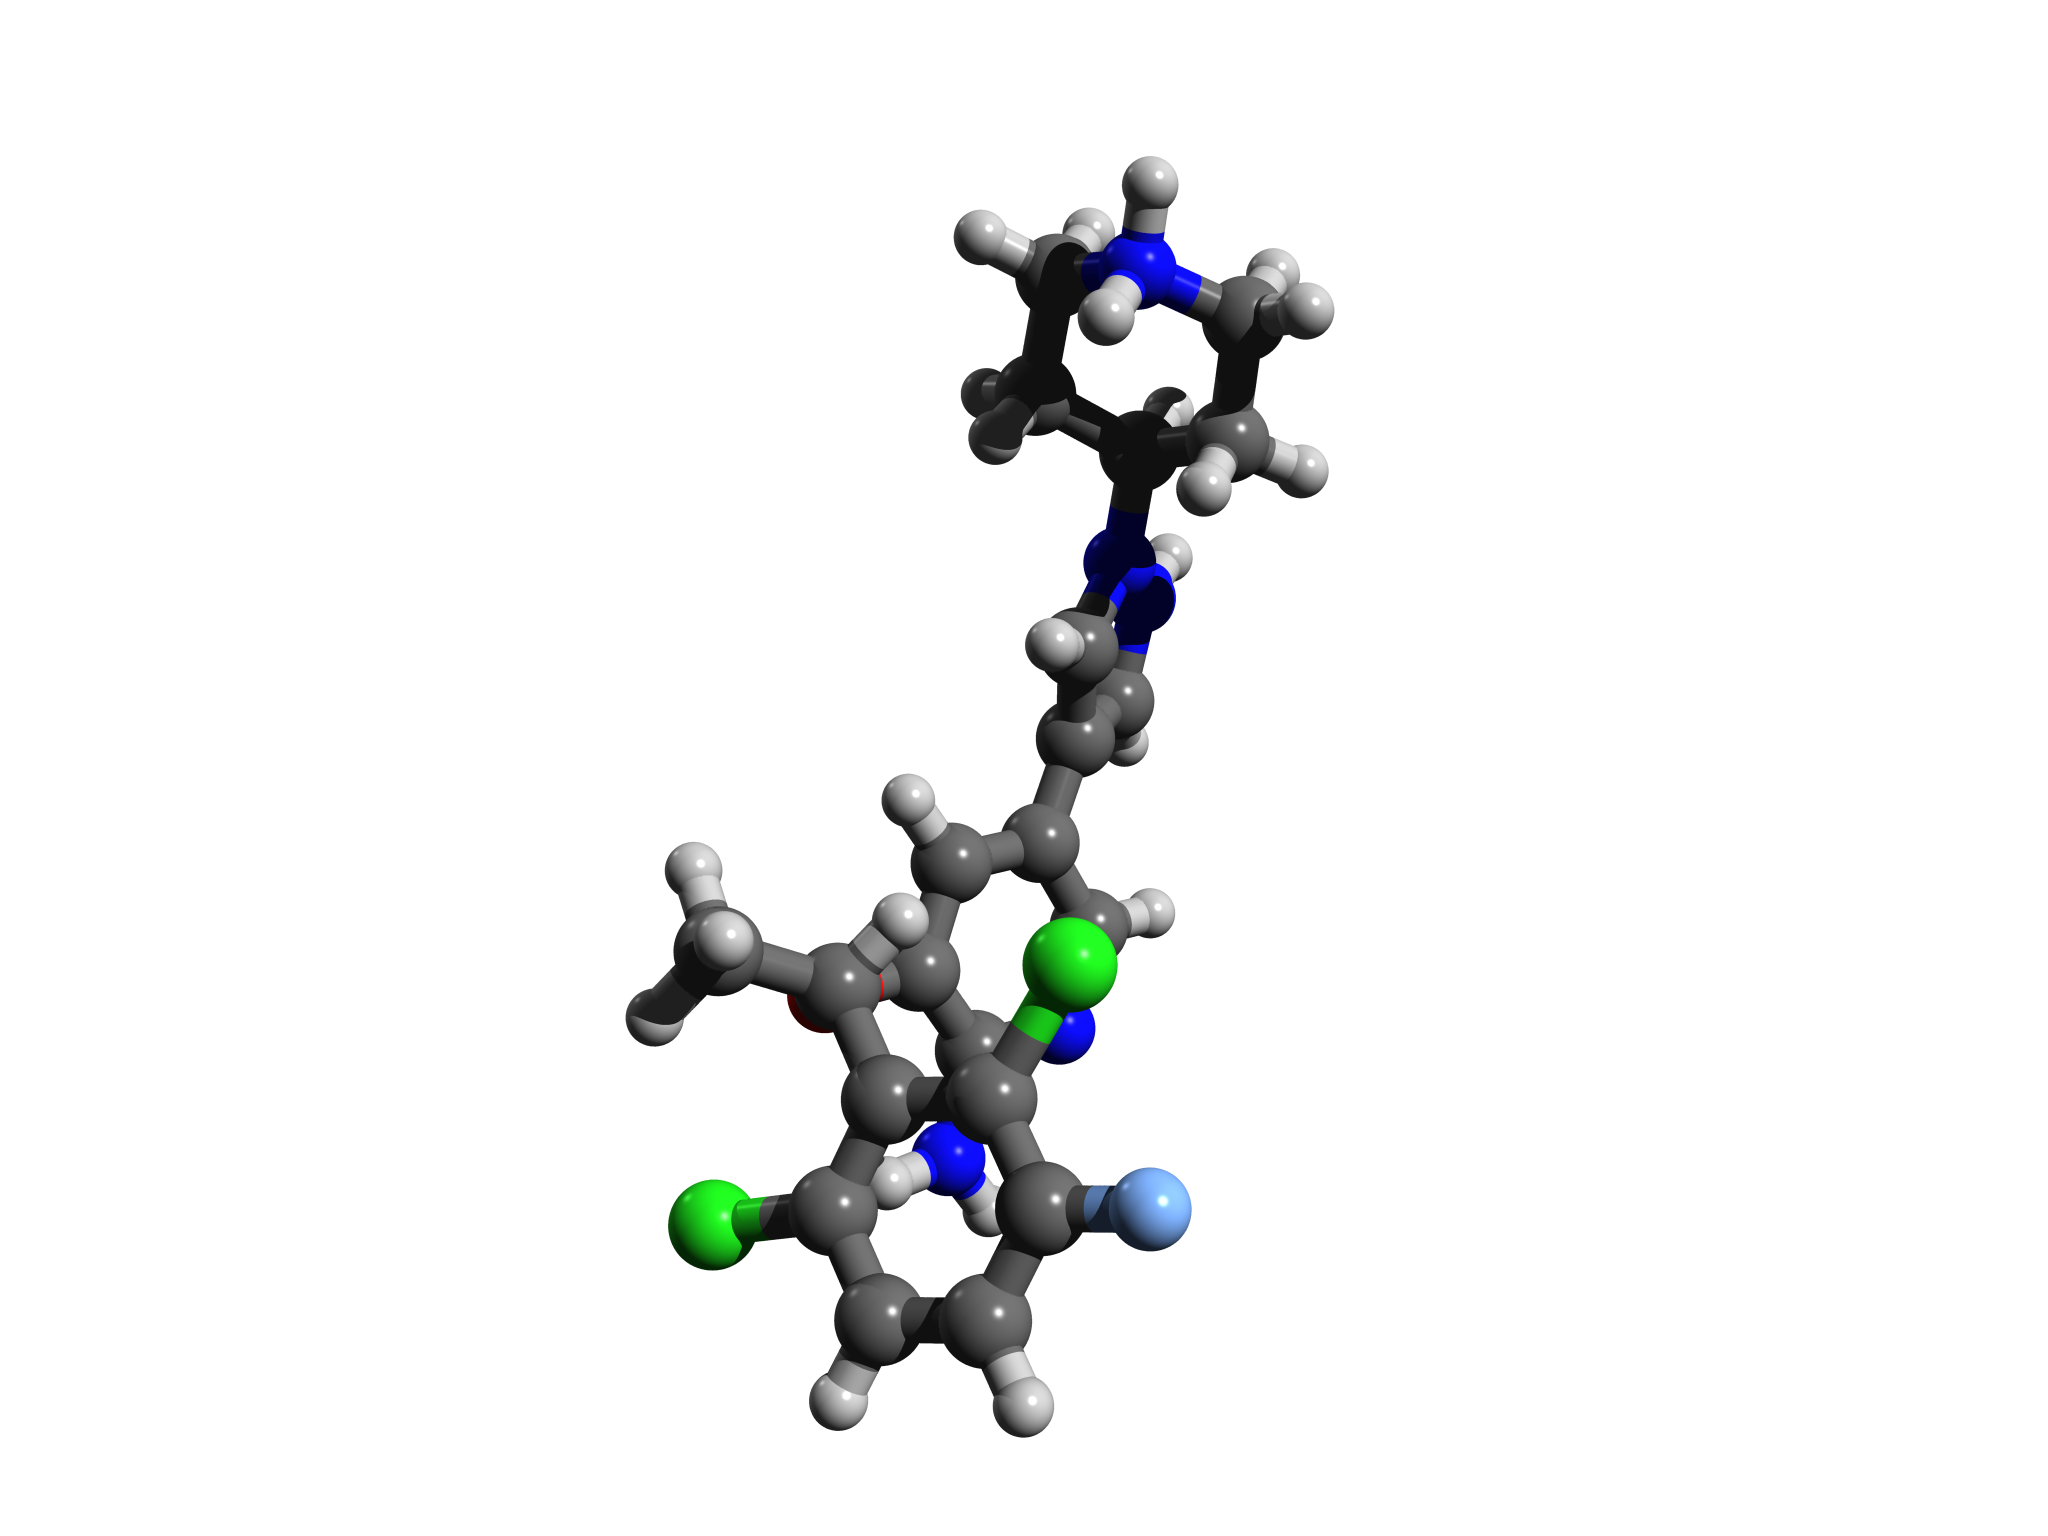

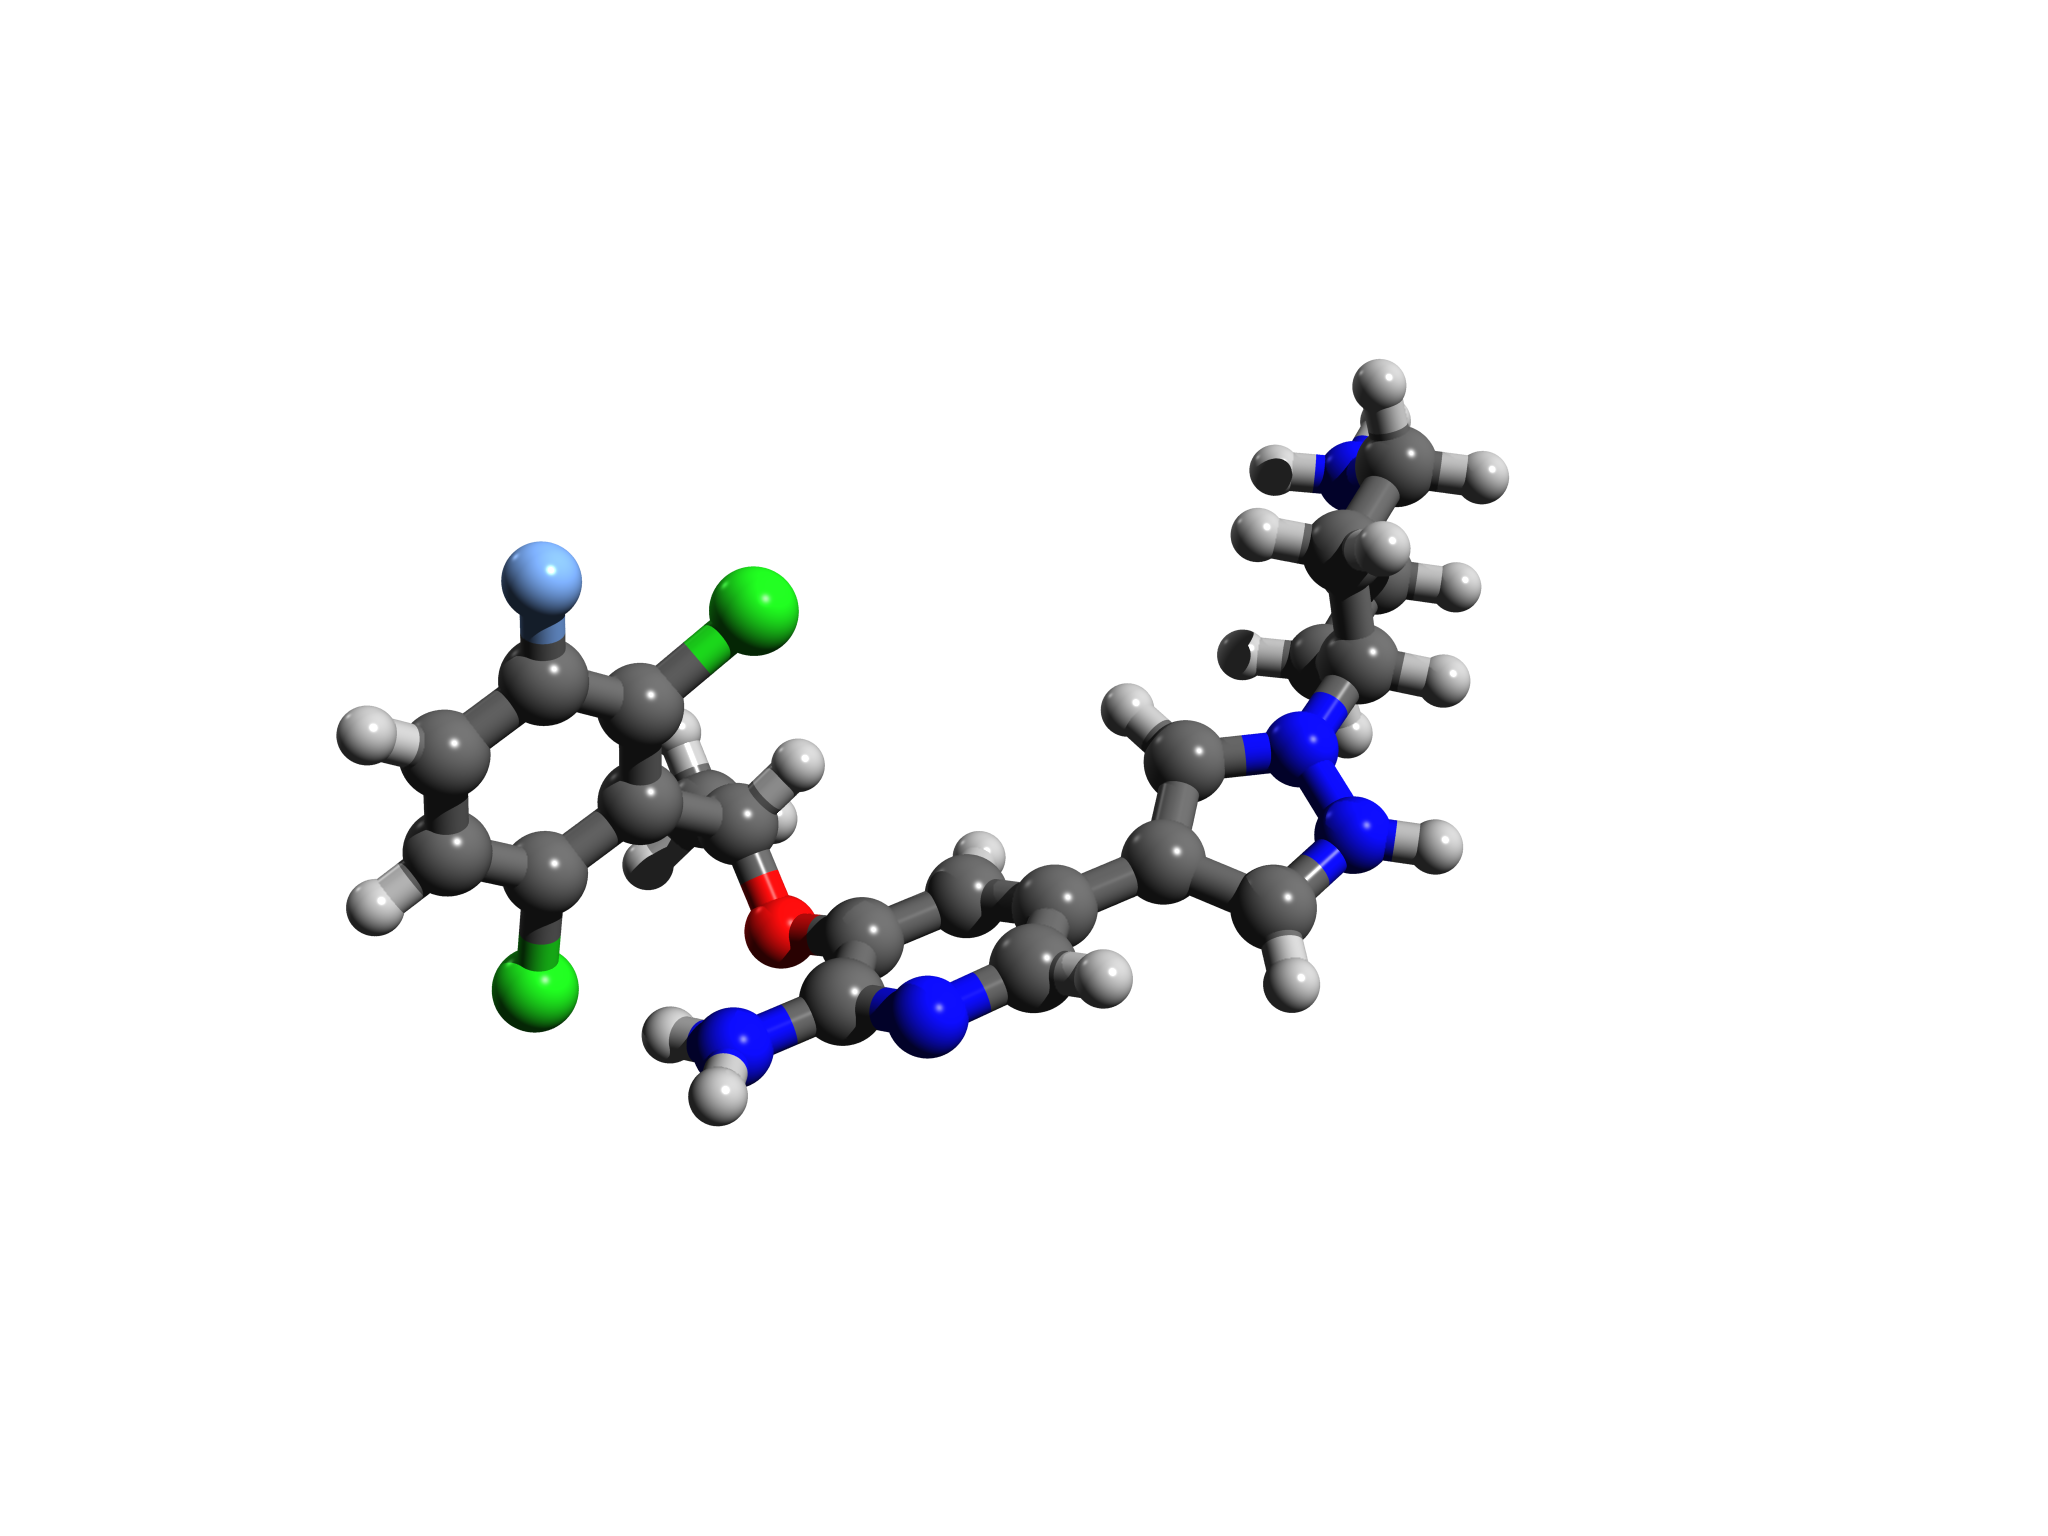